In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

In [2]:
plt.style.use("~/nice.mplstyle")

In [3]:
metric = "rmse"

In [4]:
mmgt = {}
for shortname, nicename in zip(
    ["base", "nbd", "tnbd"],
    ["MMGT", "MMGT-NBD", "MMGT-TNBD"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/mmgt/{shortname}/inference-validation"
    if shortname in ["base", "nbd"]:
        read_dir += "/trimmed"
        
    path = f"{read_dir}/{metric}.nested-lam.nc"
    mmgt[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
mmgt["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)

In [5]:
csmswt = {}
for shortname, nicename in zip(
    ["base", "win1080", "win2160", "win3240", "win4320"],
    ["w512", "w1080", "w2160", "w3240", "w4320"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/{shortname}/inference-validation"
    path = f"{read_dir}/{metric}.nested-lam.nc"
    csmswt[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
csmswt["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)
csmswt["MMGT"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/mmgt/base/inference-validation/trimmed/{metric}.nested-lam.nc", decode_timedelta=True)

In [6]:
trimtest = {}
for shortname, nicename in zip(
    ["trim10-win4320", "win4320", "trim20-win4320"],
    ["trim10", "trim15", "trim20"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/{shortname}/inference-validation"
    path = f"{read_dir}/{metric}.nested-lam.nc"
    trimtest[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
trimtest["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)
trimtest["MMGT"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/mmgt/base/inference-validation/trimmed/{metric}.nested-lam.nc", decode_timedelta=True)

In [7]:
lamloss = {}
for shortname, nicename in zip(
    ["ll01-win4320", "noll-win4320", "ll10-win4320", "ll20-win4320", "ll30-win4320", "ll40-win4320", "win4320"],
    ["1", "none", "10", "20", "30", "40", "50"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/{shortname}/inference-validation"
    path = f"{read_dir}/{metric}.nested-lam.nc"
    lamloss[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
lamloss["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)

In [8]:
edk = {}
for shortname, nicename in zip(
    ["ek24-win4320", "dk06-win4320", "win4320"],
    ["ek24-dk03", "ek12-dk06", "ek12-dk03"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/{shortname}/inference-validation"
    path = f"{read_dir}/{metric}.nested-lam.nc"
    edk[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
edk["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)

In [9]:
channels = {}
for shortname, nicename in zip(
    ["ll10-win4320", "ll10-nc0256-win4320"],
    ["512", "256"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/{shortname}/inference-validation"
    path = f"{read_dir}/{metric}.nested-lam.nc"
    channels[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
channels["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)

In [24]:
traintime = {
    "30k steps": xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/trim10-win4320/inference-validation/{metric}.nested-lam.nc", decode_timedelta=True),
    "142 epochs": xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/300epochs/csmswt/base/epoch142/inference-validation/{metric}.nested-lam.nc", decode_timedelta=True),
    "300 epochs": xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/300epochs/csmswt/base/inference-validation/{metric}.nested-lam.nc", decode_timedelta=True),
    "ll10": xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/ll10-win4320/inference-validation/{metric}.nested-lam.nc", decode_timedelta=True),
}
traintime["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)

In [20]:
trim2 = {}
for shortname, nicename in zip(
    ["logoffline-trim10-ll10-win4320", "ll10-win4320"],
    ["trim10", "trim15"],
):
    read_dir = f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/{shortname}/inference-validation"
    path = f"{read_dir}/{metric}.nested-lam.nc"
    trim2[nicename] = xr.open_dataset(path, decode_timedelta=True)
    
trim2["HRRR"] = xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/{metric}.lam.nc", decode_timedelta=True)

In [25]:
nice_names = {
    "sp": "Surface Pressure",
    "u10": "10m Zonal Wind",
    "v10": "10m Meridional Wind",
    "t2m": "2m Temperature",
    "sh2": "2m Specific Humidity",
    "gh": "Geopotential Height",
    "u": "Zonal Wind",
    "v": "Meridional Wind",
    "w": "Vertical Velocity",
    "t": "Temperature",
    "q": "Specific Humidity",
}

In [26]:
def single_plot(ax, dsdict, varname, sel=None, **kwargs):
    xticks = None
    for label, xds in dsdict.items():
        
        plotme = xds[varname] if sel is None else xds[varname].sel(**sel)
        if xticks is None:
            xticks = plotme.fhr.values
        df = plotme.to_dataframe().reset_index()
        if label == "HRRR":
            color="gray"
        elif label == "THRRR":
            color="black"
        else:
            color=None
        sns.lineplot(
            data=df,
            x="fhr",
            y=varname,
            ax=ax,
            label=label,
            color=color,
            **kwargs,
        )
    xticks = xticks if len(xticks)<10 else np.concatenate([ [xticks[0]], xticks[4::4]])
    ax.set(
        ylabel=metric.upper() if ax.get_subplotspec().is_first_col() else "",
        xlabel="Forecast Hour" if ax.get_subplotspec().is_last_row() else "",
        title=nice_names[varname] if ax.get_subplotspec().is_first_row() else "",
        xticks=xticks,
    )
    ax.legend(frameon=False)

In [27]:
def plot_surface_error(surface_vars, dsdict=mmgt, model_filter=None, **kwargs):
    ncols = len(surface_vars)
    fig, axs = plt.subplots(1, ncols, figsize=(5*ncols, 4), constrained_layout=True)

    if len(surface_vars) == 1:
        axs = [axs]
    for varname, ax in zip(surface_vars, axs):
        single_plot(ax=ax, dsdict=dsdict, varname=varname, **kwargs)
    return fig, axs

In [28]:
def plot_level_vars(level_vars, dsdict=mmgt, **kwargs):
    
    levels = dsdict["HRRR"].level.values
    ncols = len(level_vars)
    nrows = len(levels)
    fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 4.5*nrows), constrained_layout=True)

    if len(levels) == 1:
        axs = [axs]
    if len(level_vars) == 1:
        axs = [axs]

    sel = kwargs.pop("sel", {})
    for level, axr in zip(levels, axs):
        for varname, ax in zip(level_vars, axr):
            
            sel["level"] = level
            single_plot(ax=ax, dsdict=dsdict, varname=varname, sel=sel, **kwargs)
            ax.legend(title=f"{level} hPa", frameon=False)
    return fig, axs

## SMSWT architectures
### Window Size Test

### Surface

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict=csmswt,
        **kwargs,
    );

512 and 1080 are clearly out...

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict={key: xds for key, xds in csmswt.items() if key in ("w2160", "w3240", "w4320", "HRRR", "MMGT")},
        **kwargs,
    );

The only real difference between 2160, 3240, and 4320 is in surface pressure

In [ ]:
plot_surface_error(
    ["sp", "t2m"],
    dsdict={key: xds for key, xds in csmswt.items() if key in ("w3240", "w4320", "HRRR", "MMGT")},
    sel={"fhr": slice(49)},
    marker="o",
);

In [ ]:
fig, axs = plot_surface_error(
    ["sp", "t2m"],
    dsdict={key: xds for key, xds in csmswt.items() if key in ("w1080", "w4320", "HRRR", "MMGT")},
    sel={"fhr": slice(49)},
    marker="o",
)
fig.savefig("figures/window_size.jpeg", bbox_inches="tight", dpi=300)

### Pressure Levels

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict=csmswt,
        **kwargs,
    )

Zoom in on a few window sizes

In [ ]:
plot_level_vars(
    ["gh", "u", "v", "w", "t", "q"],
    dsdict={key: xds for key, xds in csmswt.items() if key in ("w2160", "w3240", "w4320", "HRRR", "MMGT")},
    sel={"fhr": slice(49)},
    marker="o",
);

Really 4320 is necessary to get the same skill as MMGT on Geopotential height. It's otherwise basically a toss up between 4320, 3240, and MMGT (although in some instances the transformer is doing a bit better).

## Trim Test for SMSWT

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict=trimtest,
        **kwargs,
    );

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict=trimtest,
        **kwargs,
    )

This bit of trimming does not seem to really matter. It'll come down to how it looks visually and minimizing how much HRRR we cut out.

### LAM Loss Fraction

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict={k: v for k, v in lamloss.items() if k in ["1", "none", "10", "20", "50", "HRRR"]},
        **kwargs,
    );

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict={k: v for k, v in lamloss.items() if k in ["1", "none", "10", "20", "50", "HRRR"]},
        **kwargs,
    )

In [ ]:
lamlossselect = {
    k: lamloss[k].sel(level=[500])
    for k in ["50", "30", "10", "none", "HRRR"]
}

In [ ]:
fig, axs = plot_level_vars(
    ["gh", "t"],
    dsdict=lamlossselect,
    **{"sel": {"fhr": slice(49)}, "marker": "o"},
)
fig.savefig(f"figures/lamloss_500hpa.jpeg", dpi=300, bbox_inches="tight")

In [ ]:
fig, axs = plot_surface_error(
    ["sp", "t2m"],
    dsdict=lamlossselect,
    **{"sel": {"fhr": slice(49)}, "marker": "o"},
)
fig.savefig(f"figures/lamloss_surface.jpeg", dpi=300, bbox_inches="tight")

### Test encoder / decoder KNN

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict=edk,
        **kwargs,
    );

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict=edk,
        **kwargs,
    )

### Test num. channels (network width)

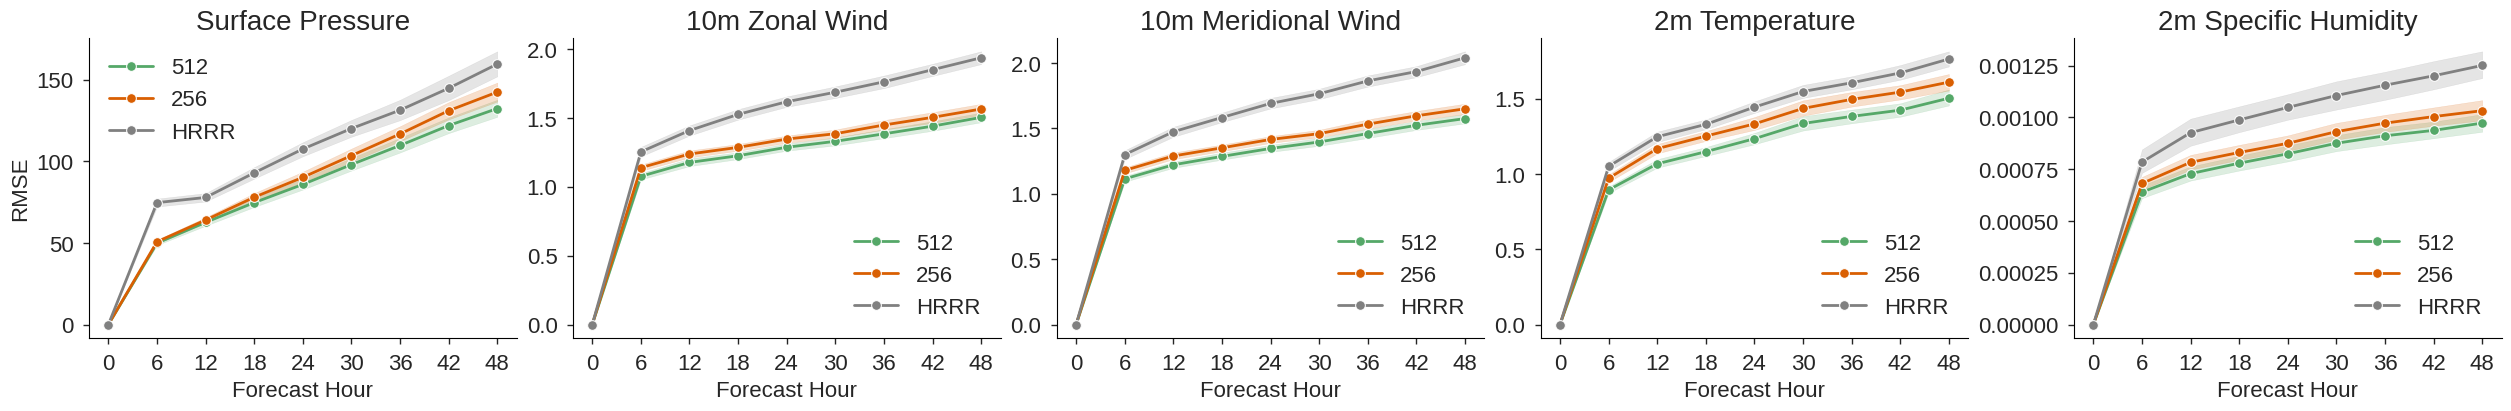

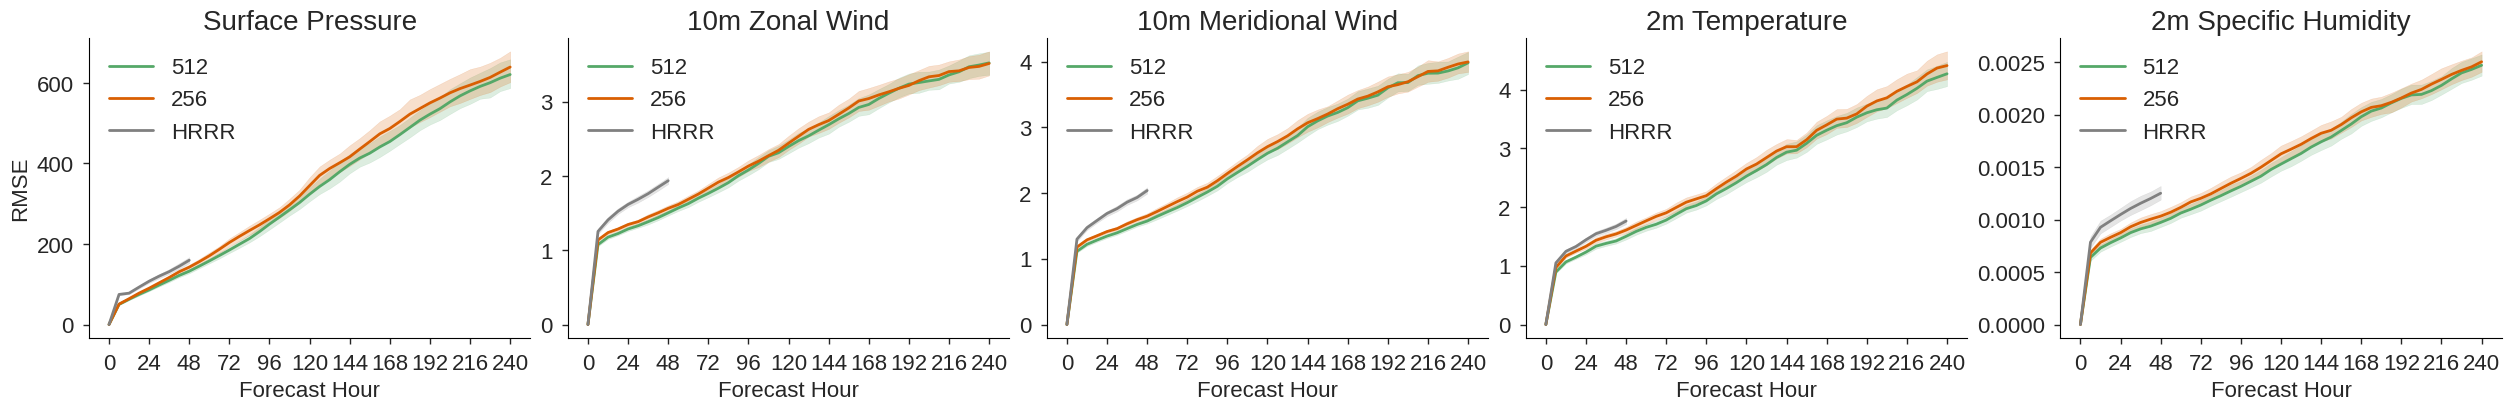

In [15]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict=channels,
        **kwargs,
    );

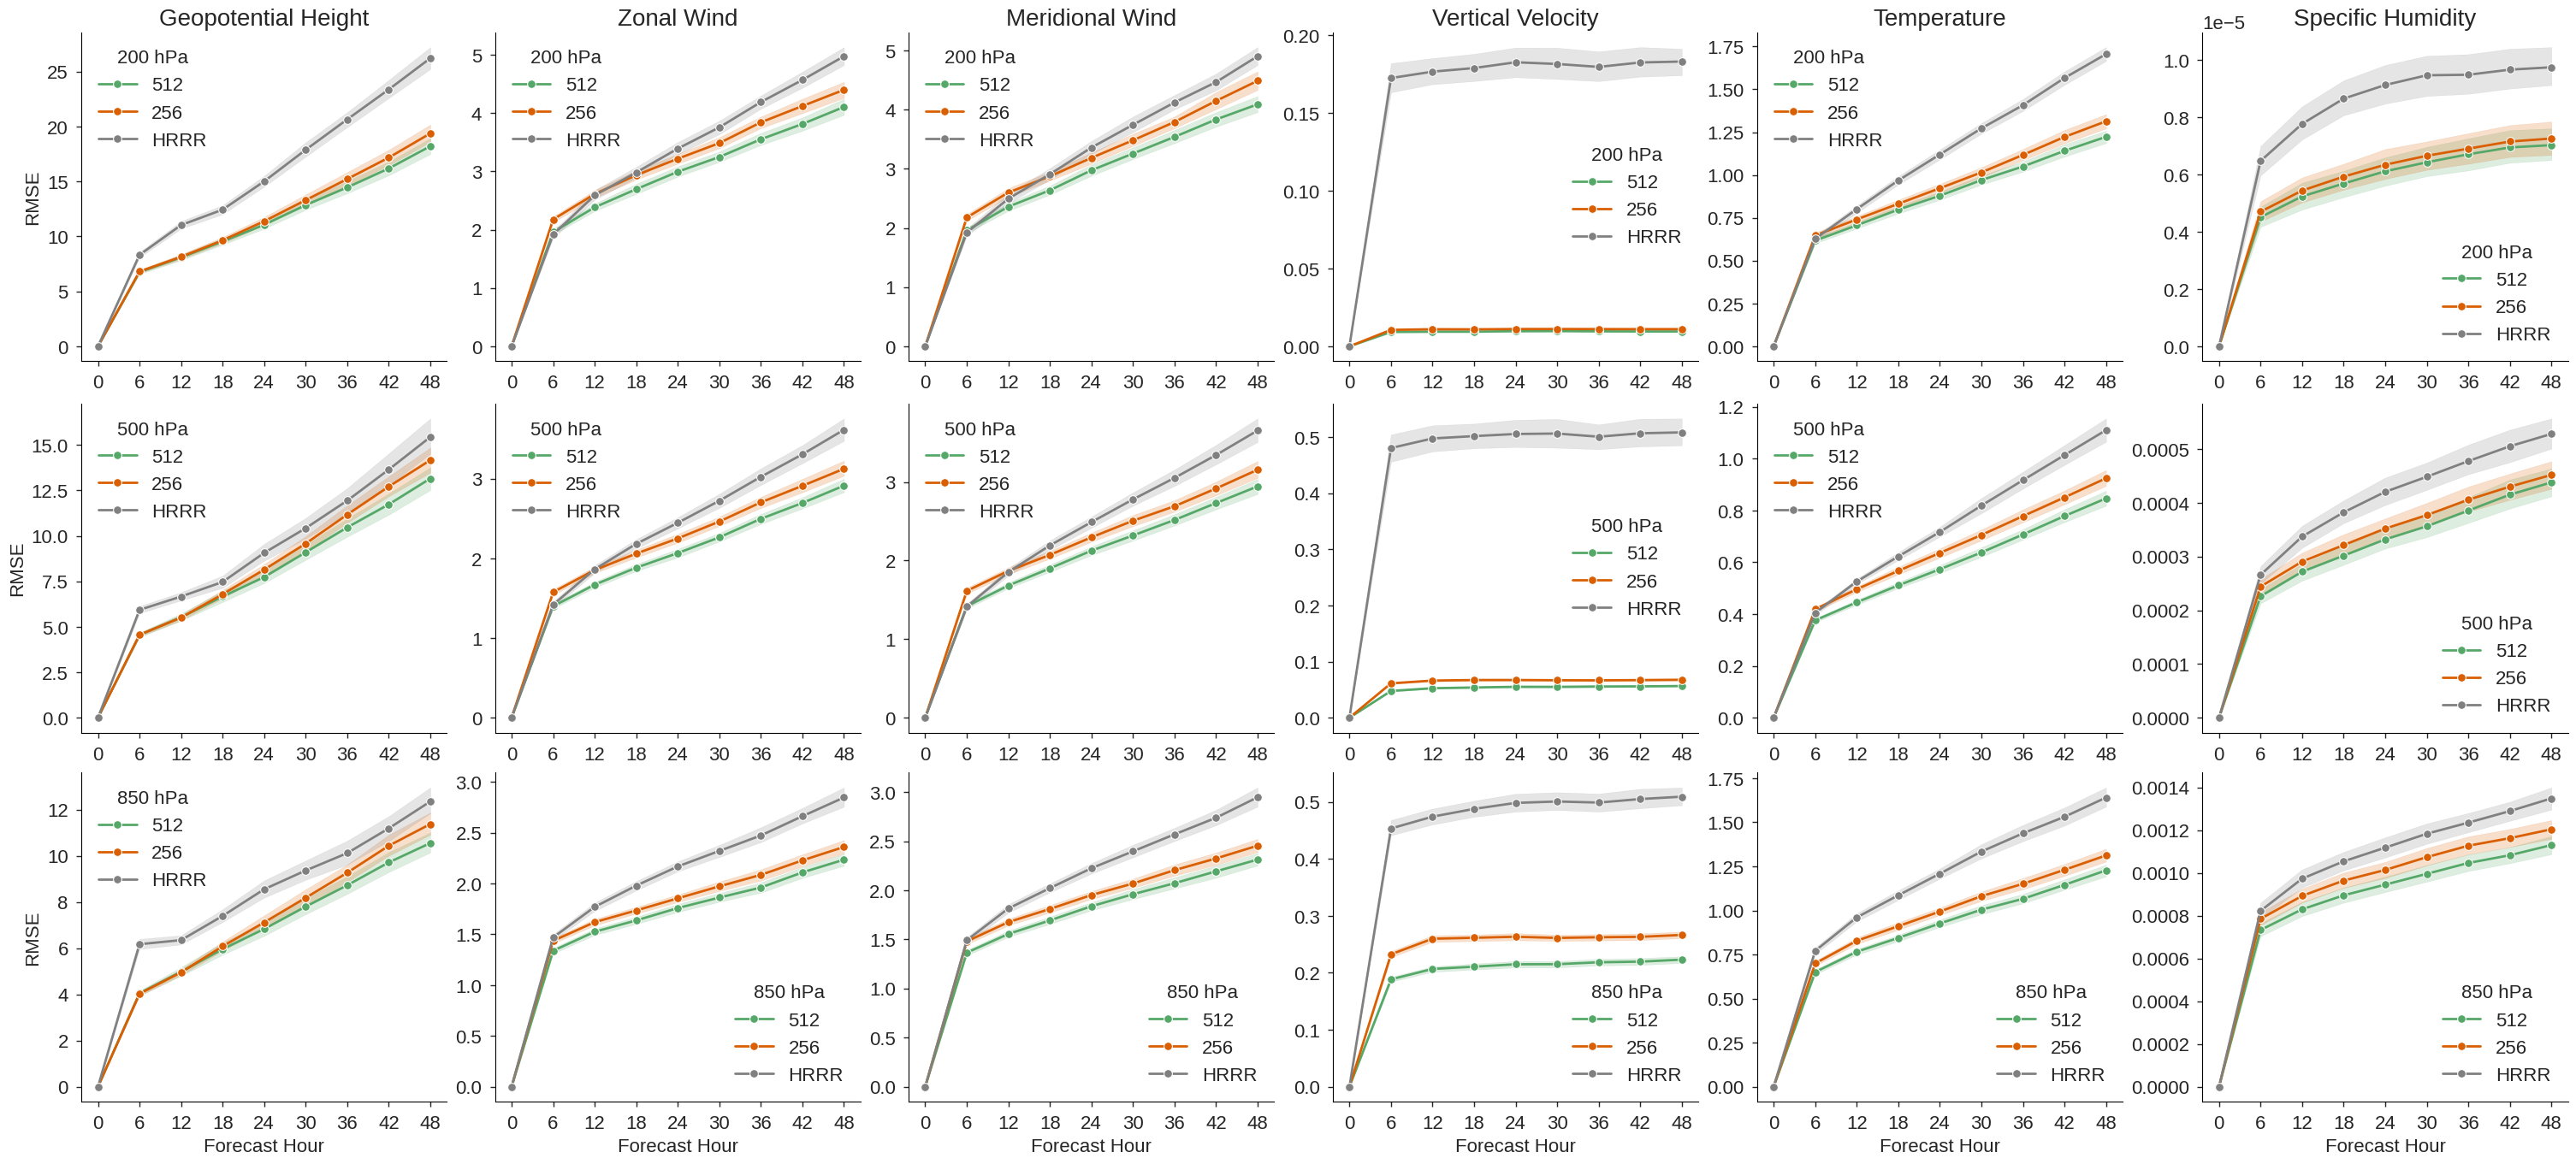

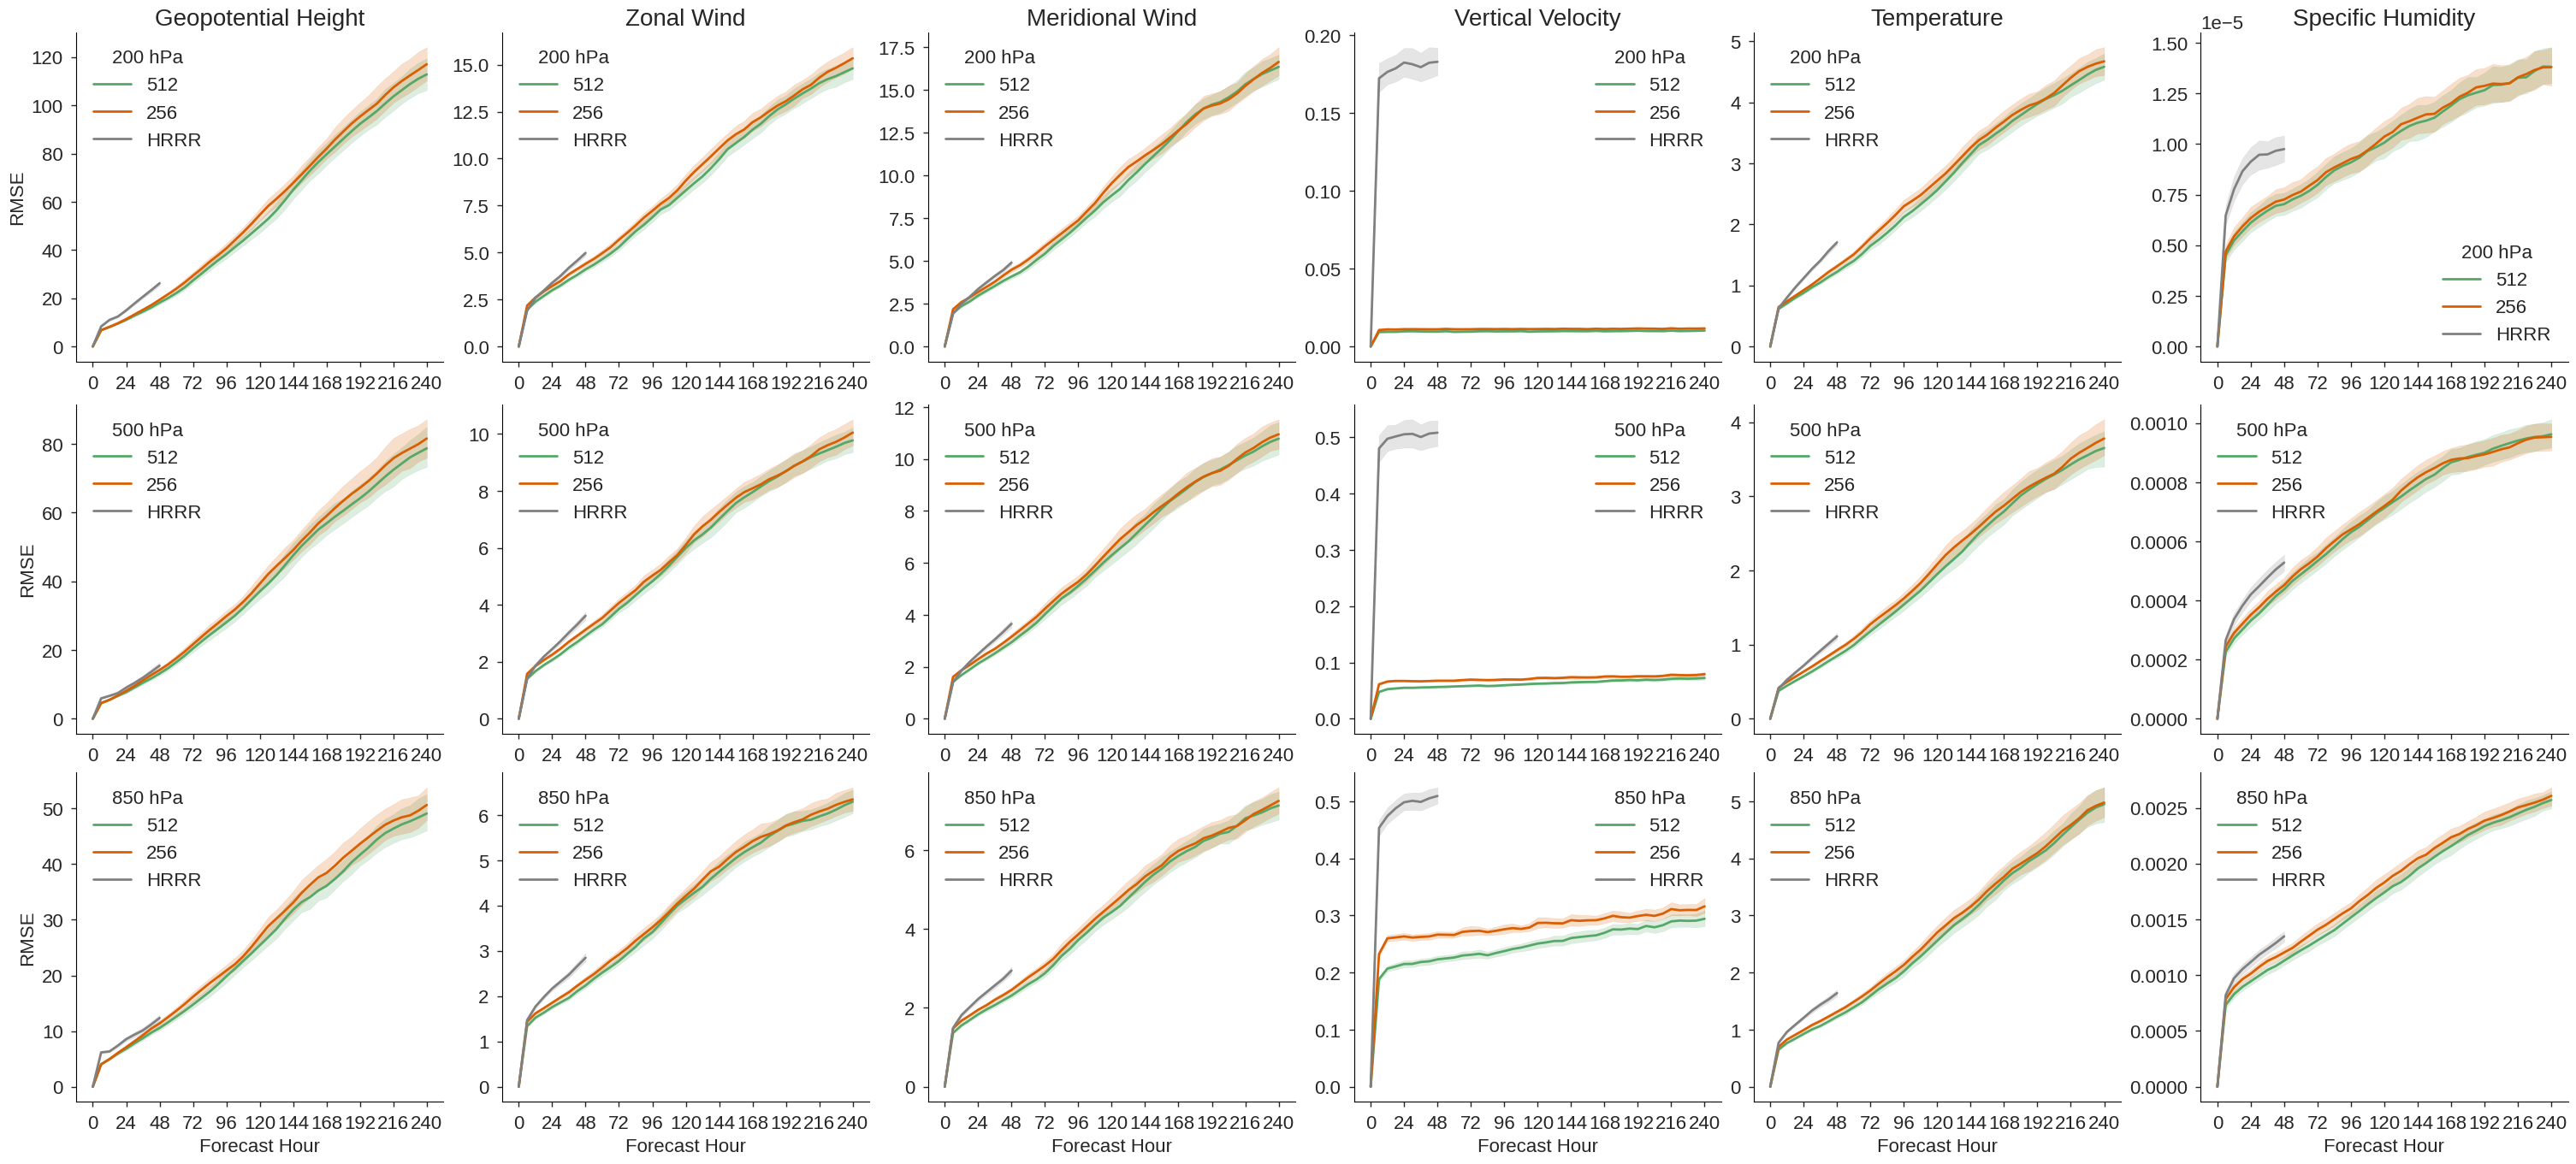

In [16]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict=channels,
        **kwargs,
    )

### Trim Test revisited
with Lam Loss = 10%

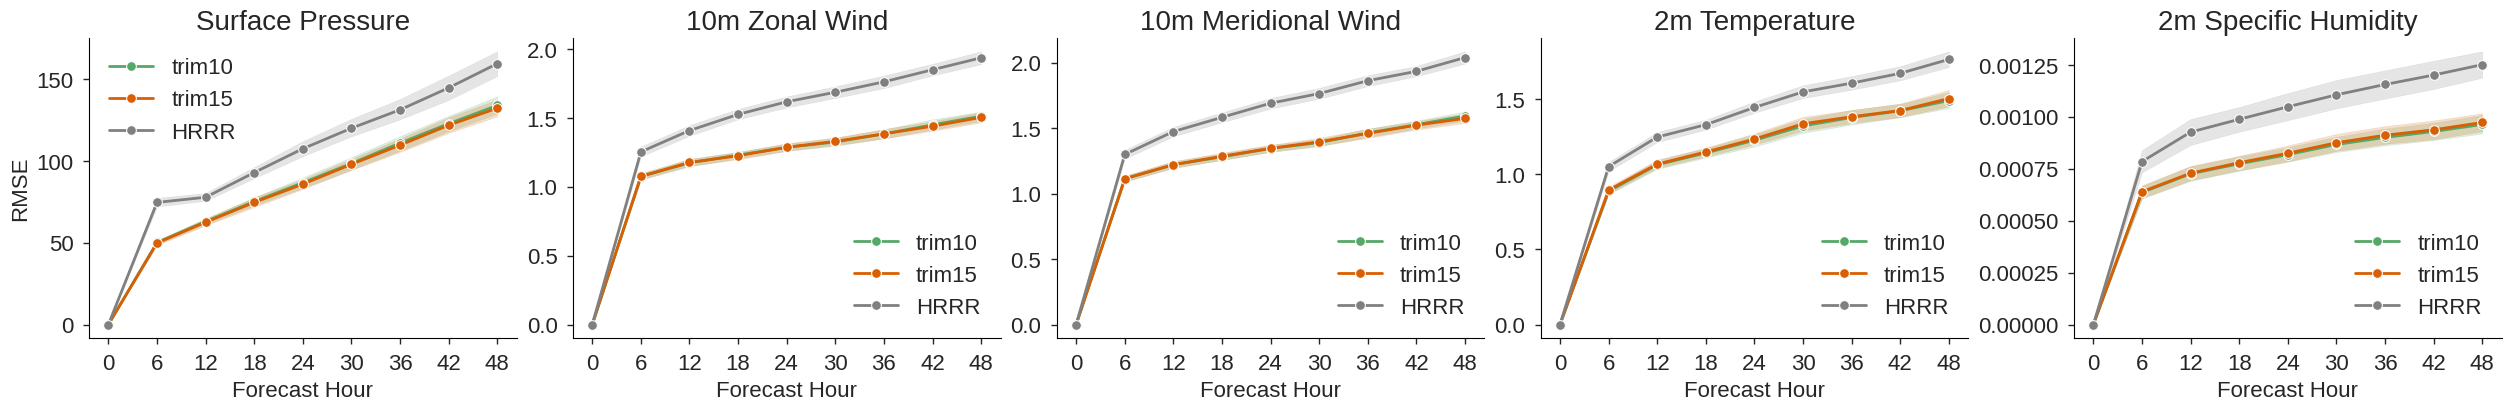

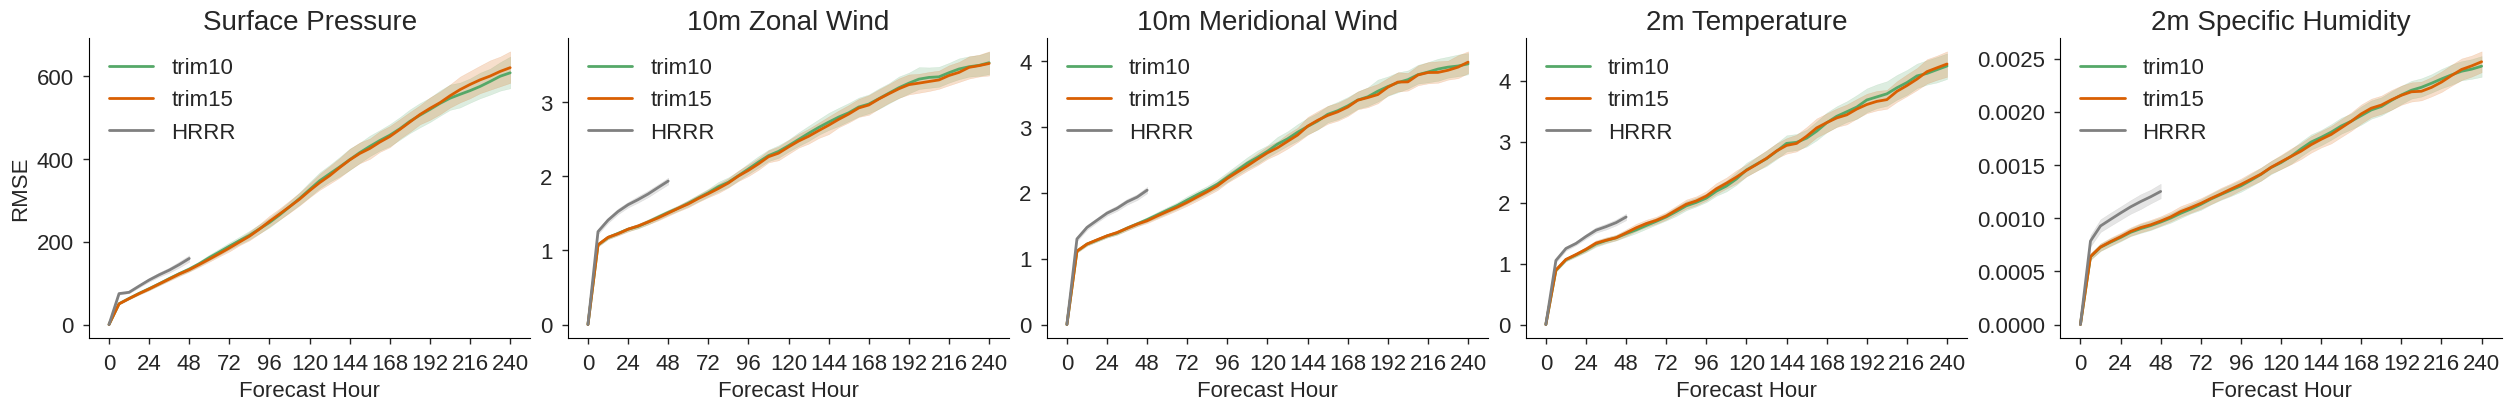

In [21]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict=trim2,
        **kwargs,
    );

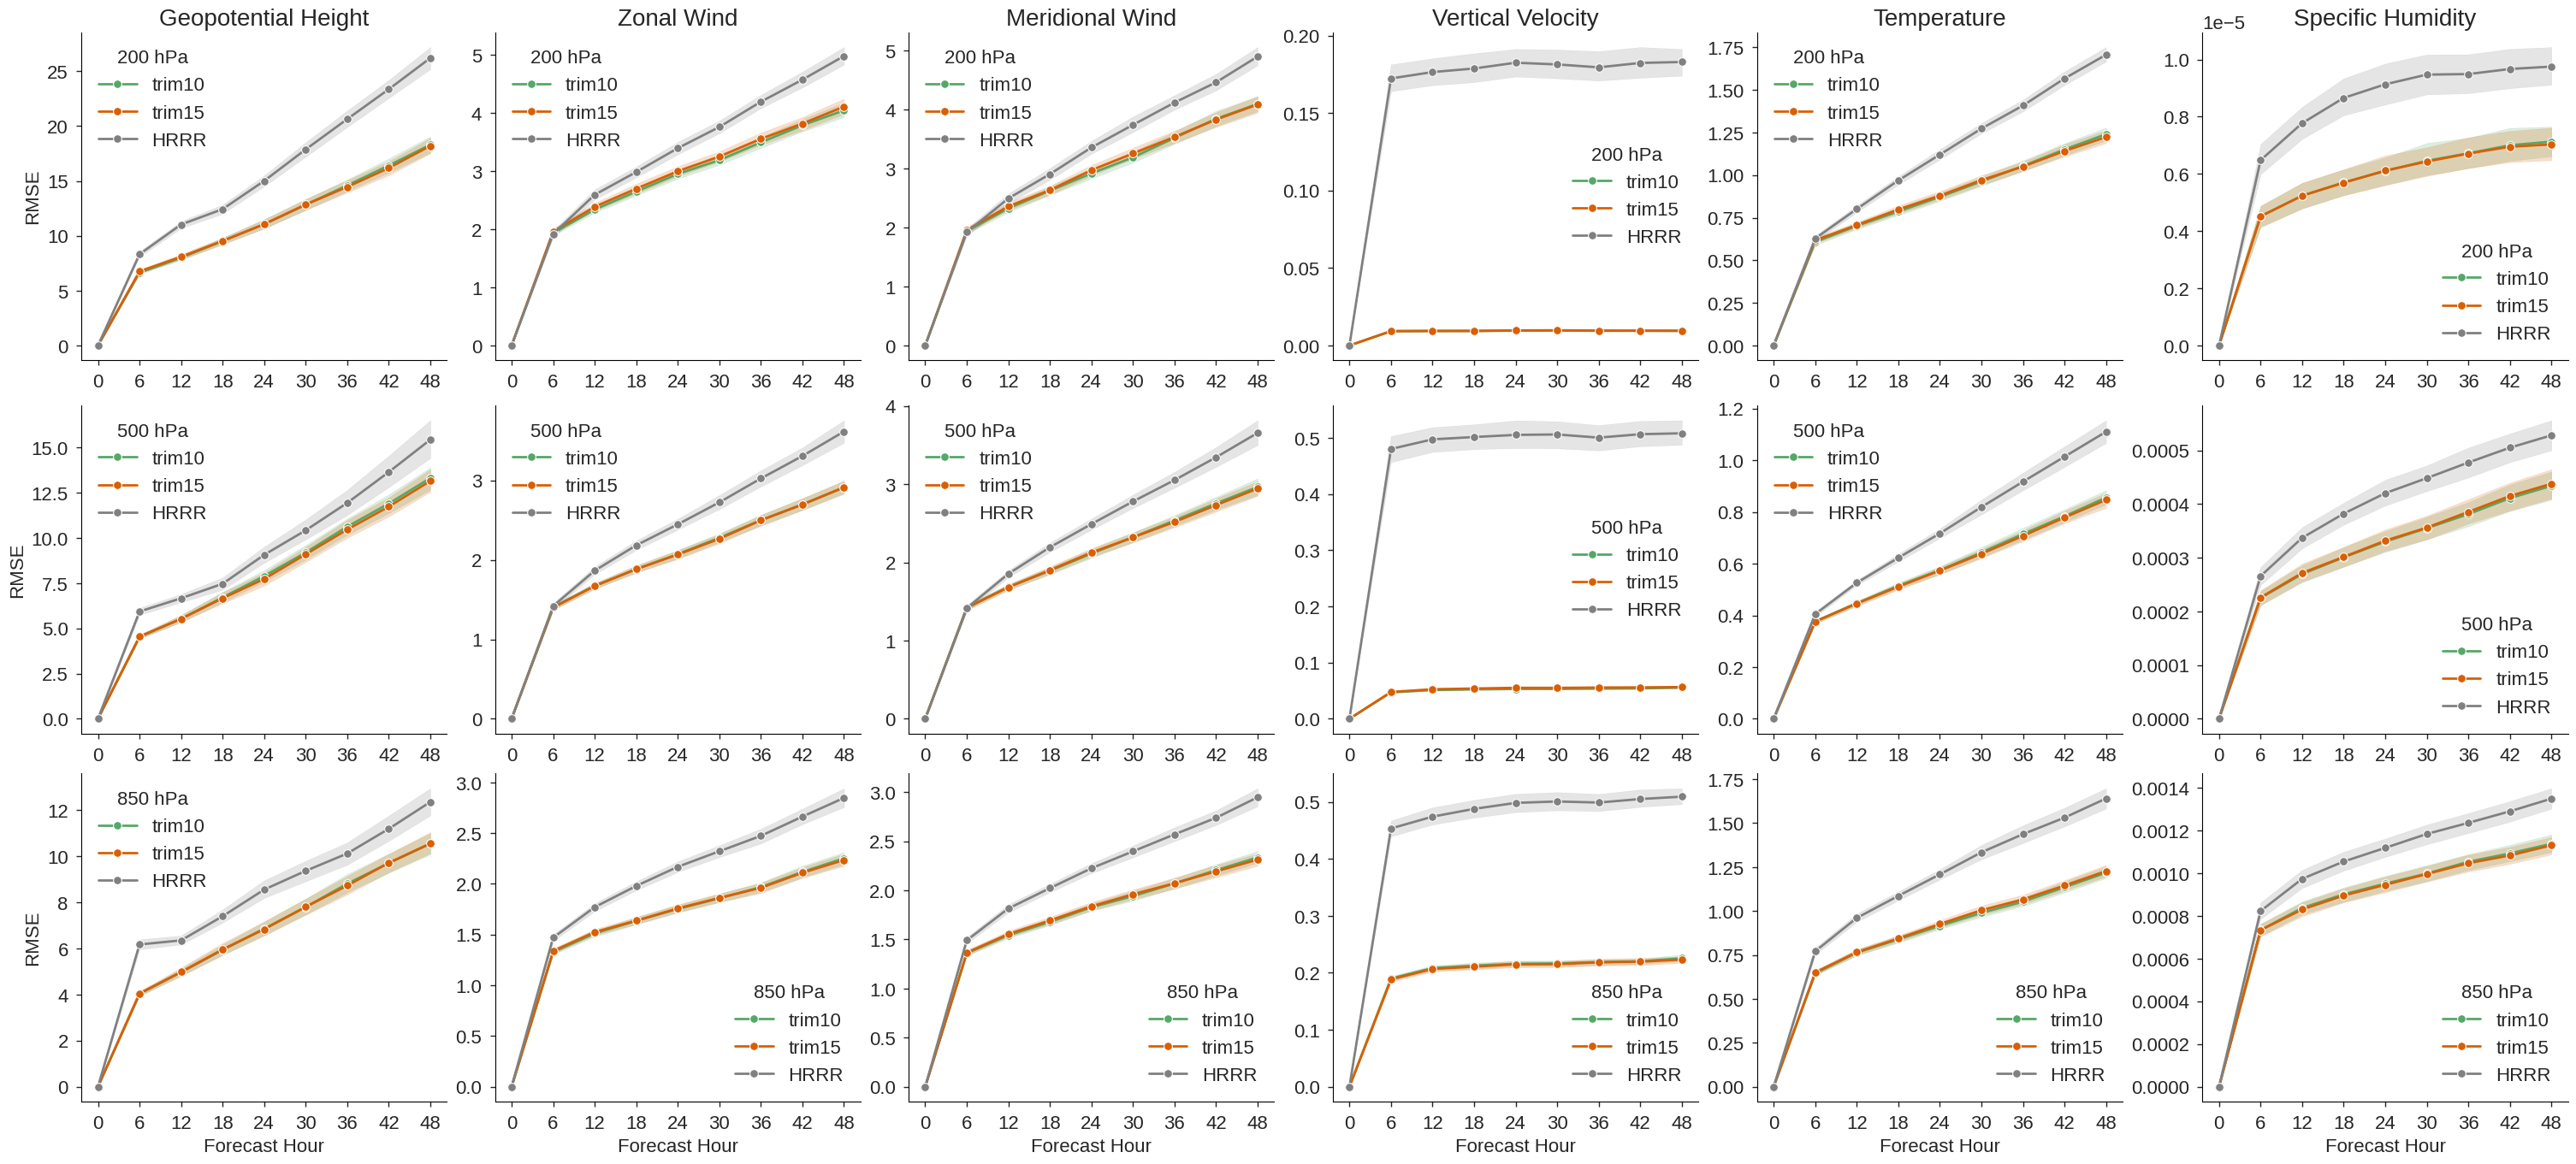

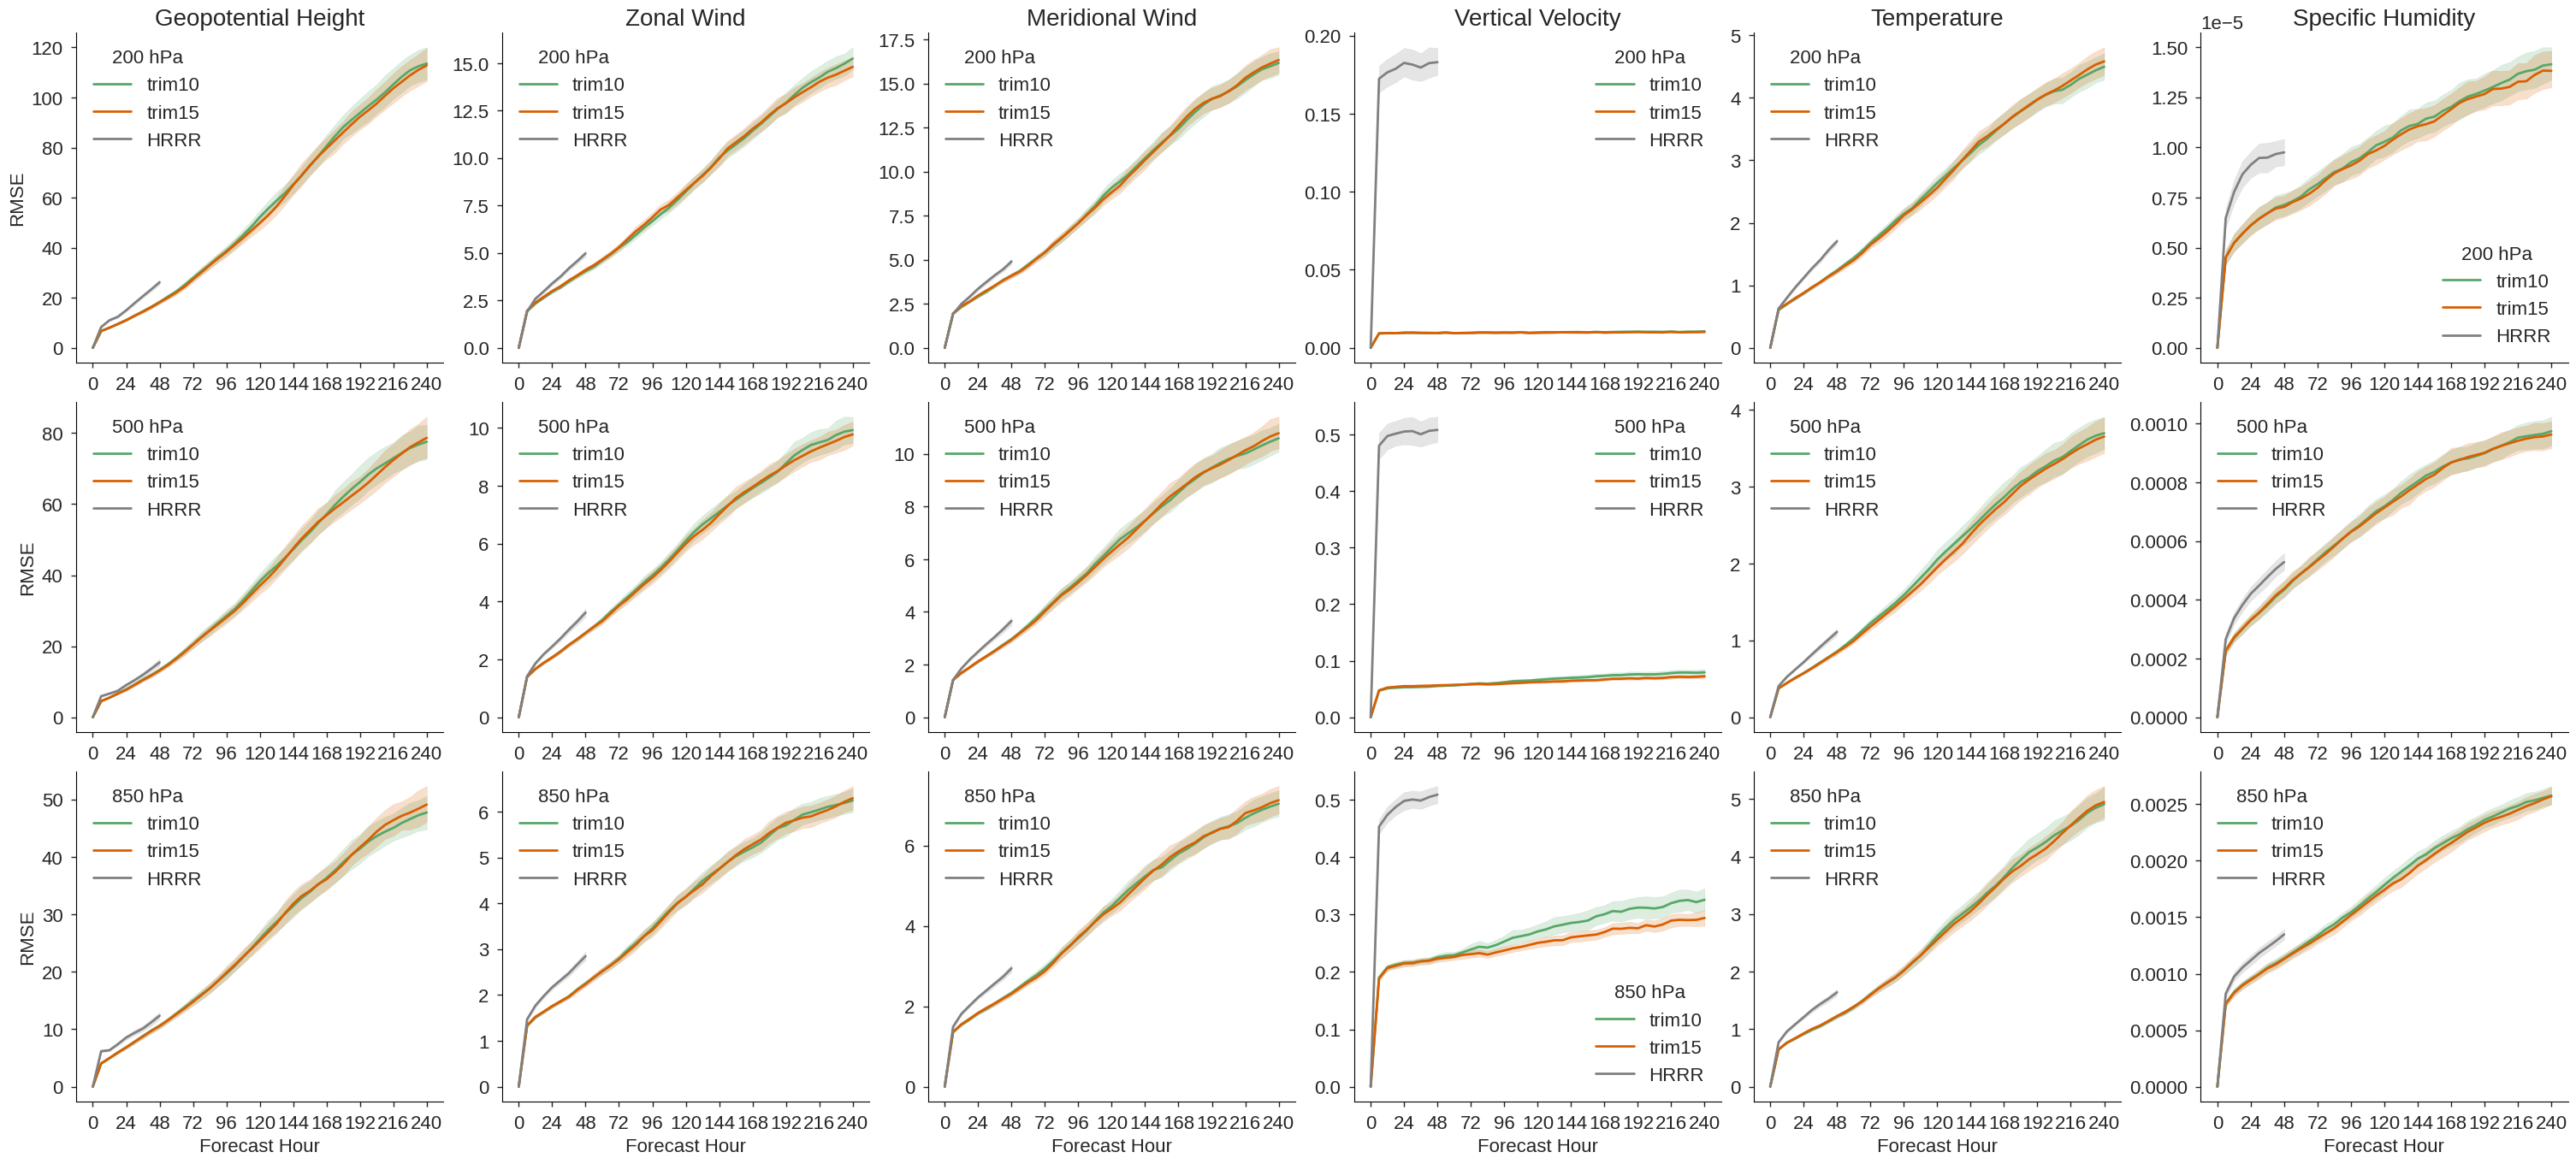

In [22]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict=trim2,
        **kwargs,
    )

### How much does more training give

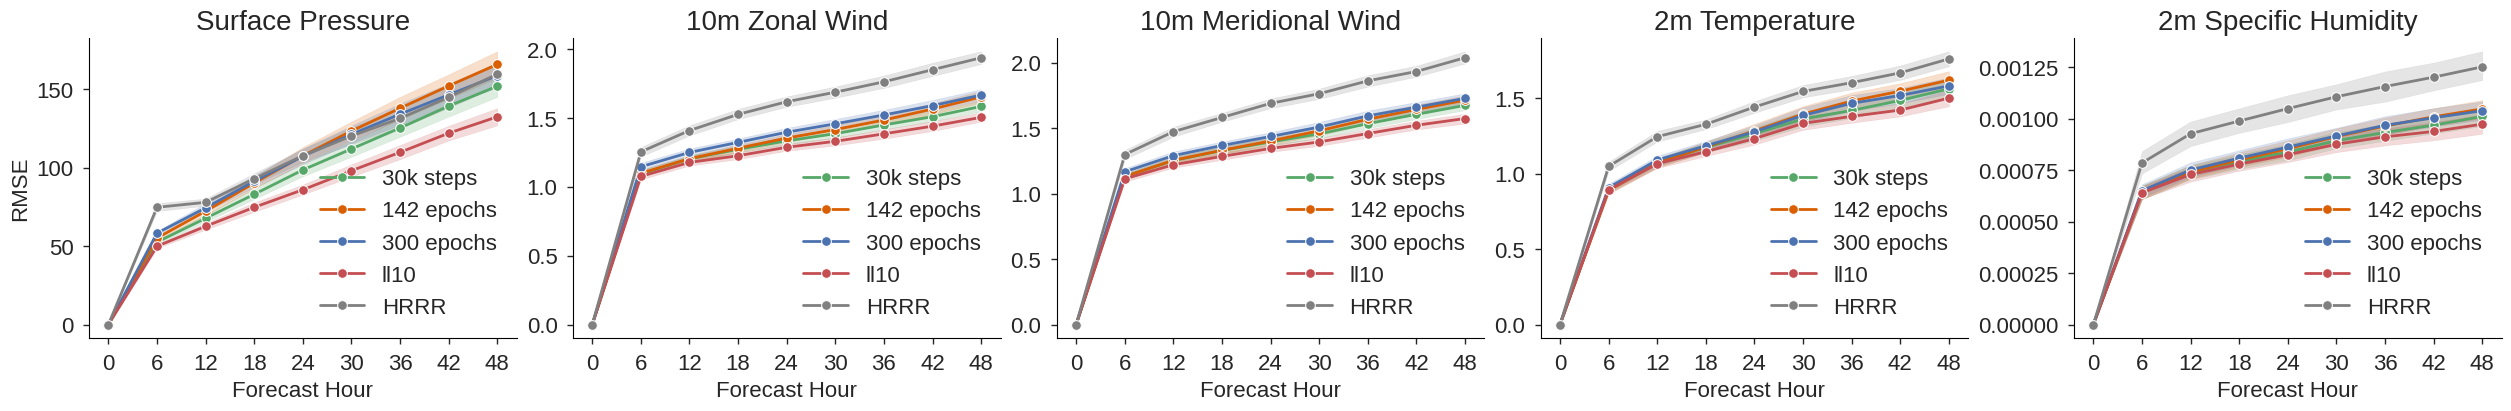

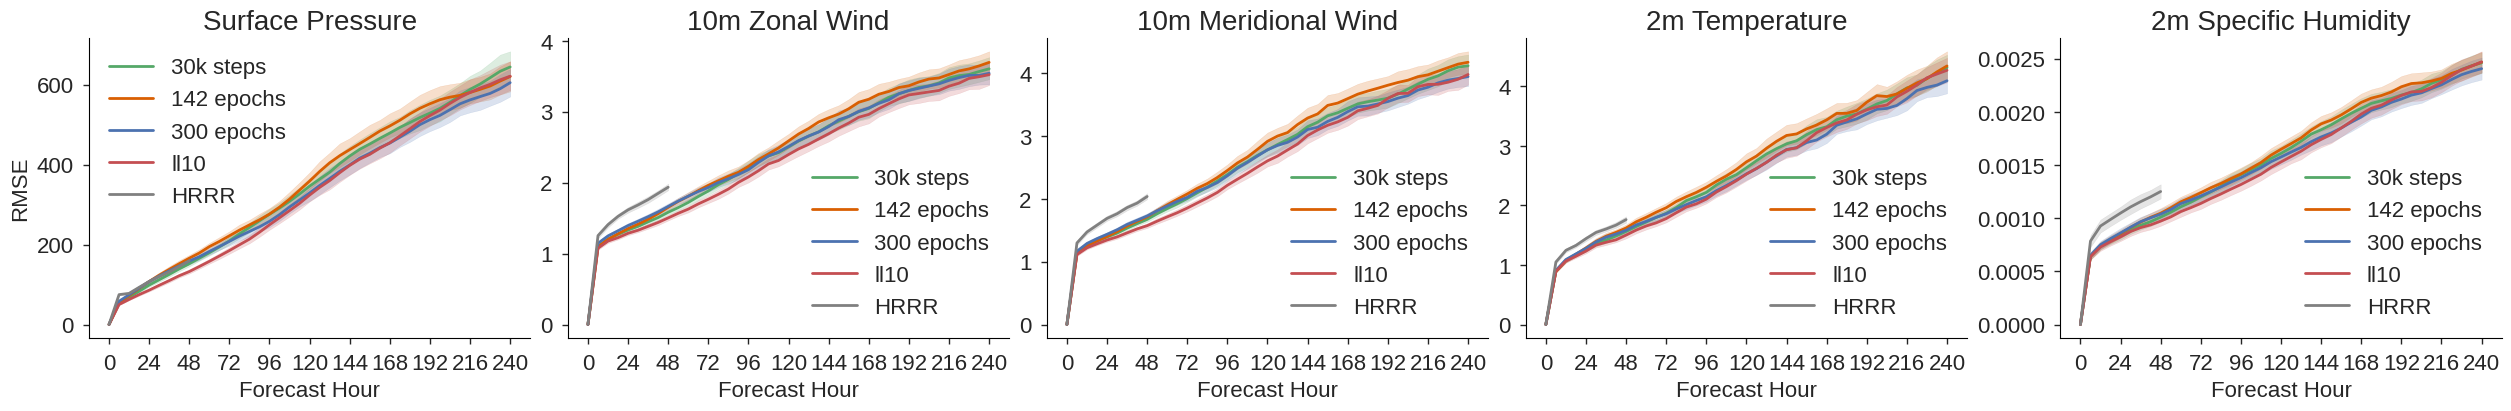

In [29]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict=traintime,
        **kwargs,
    );

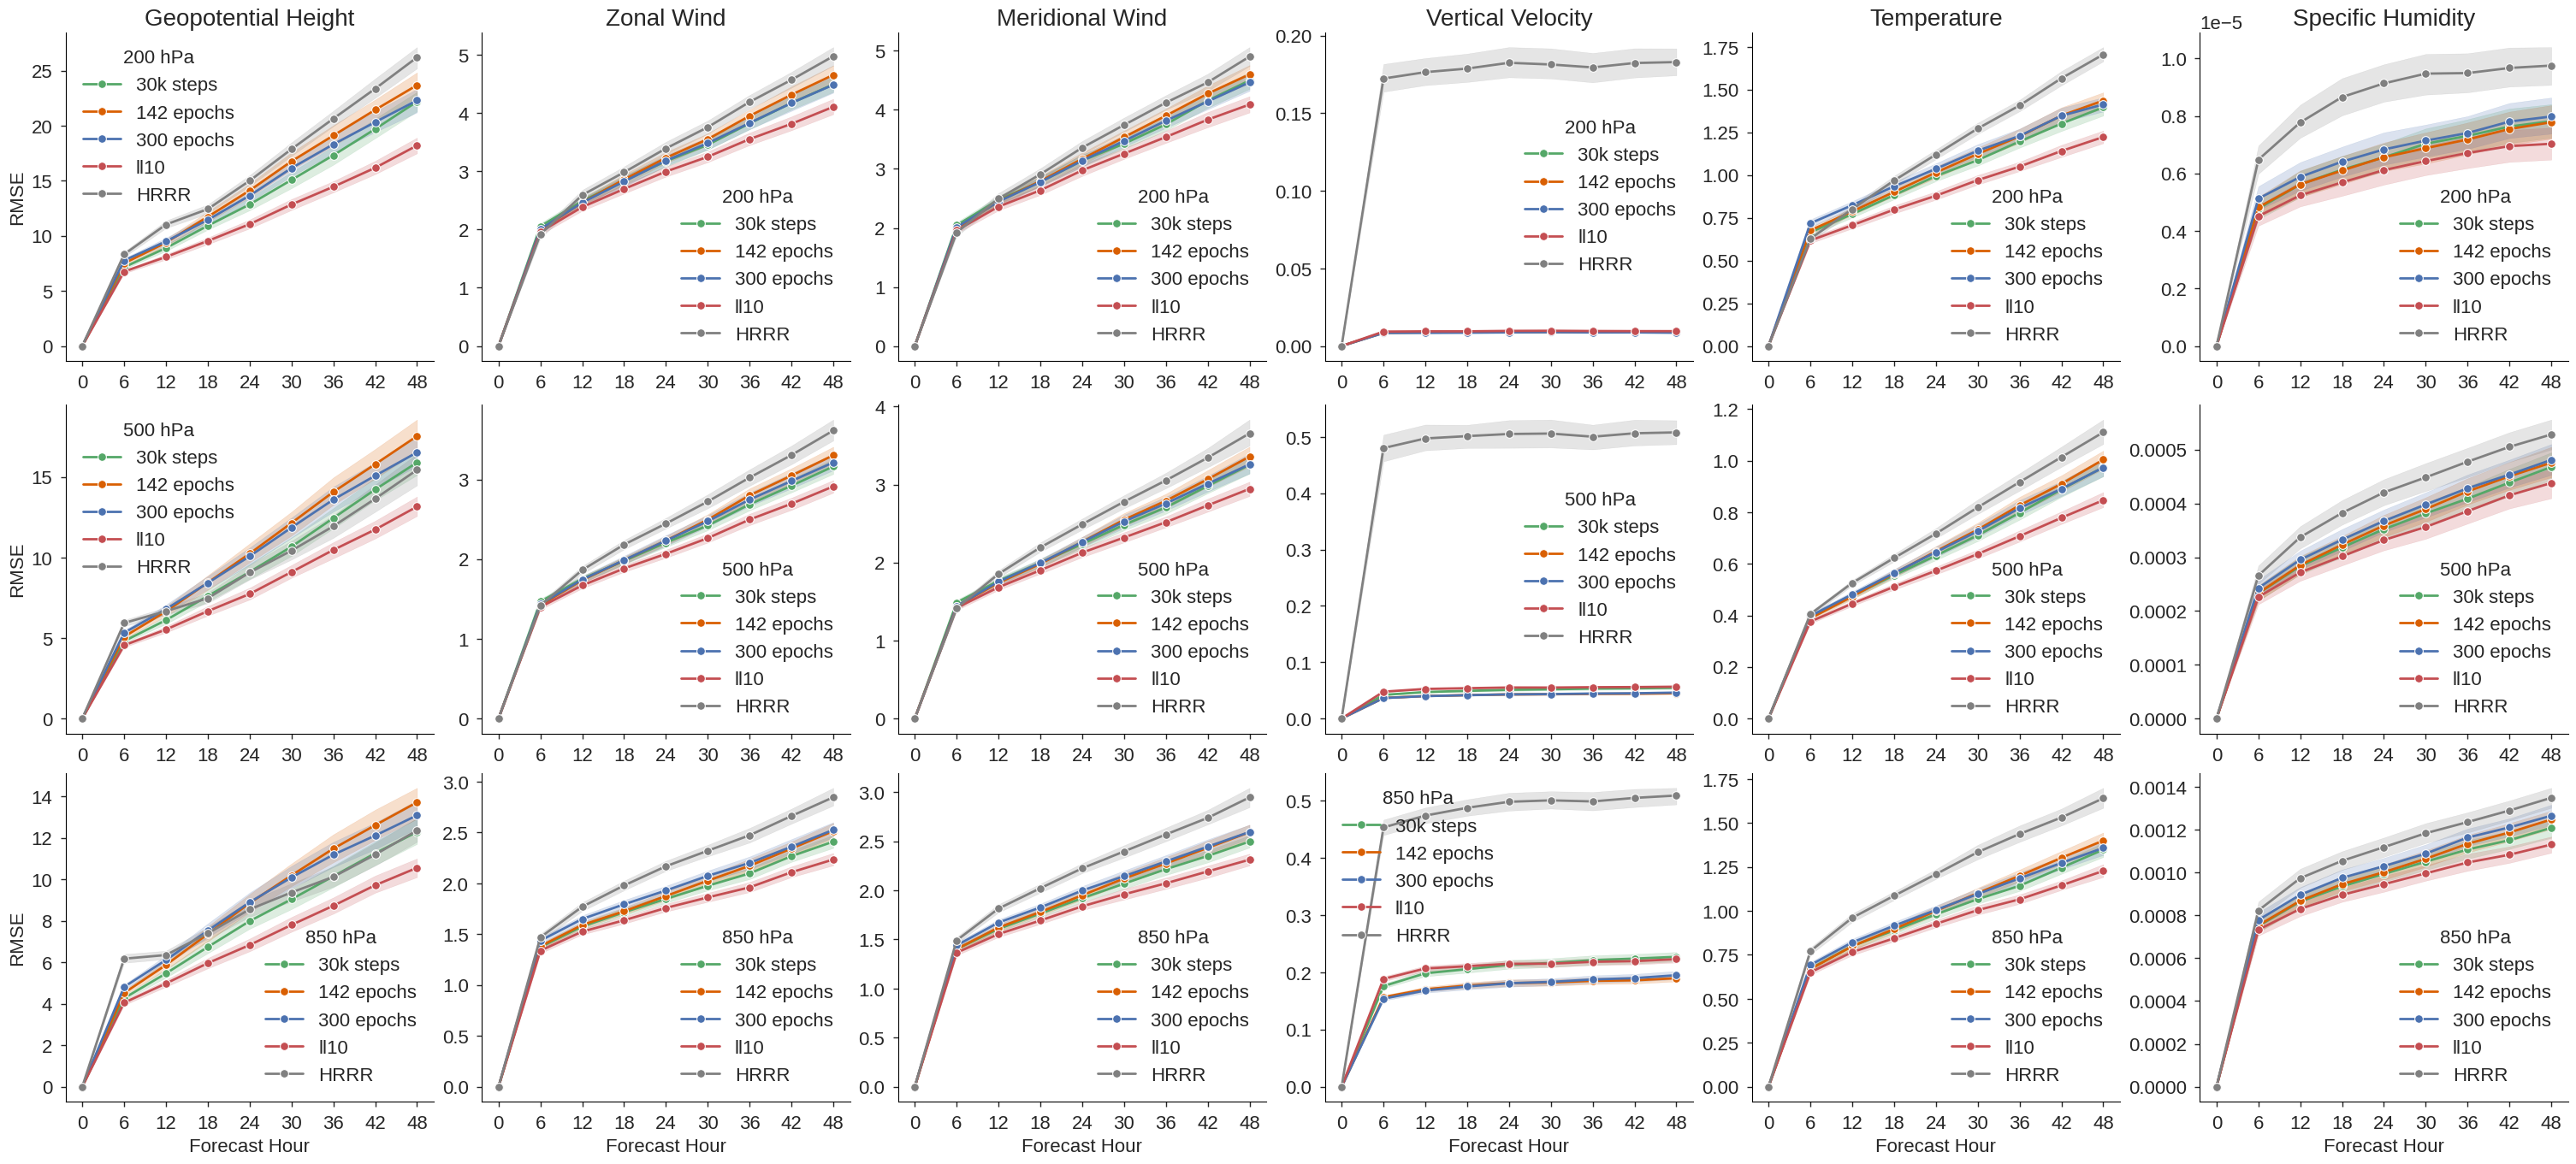

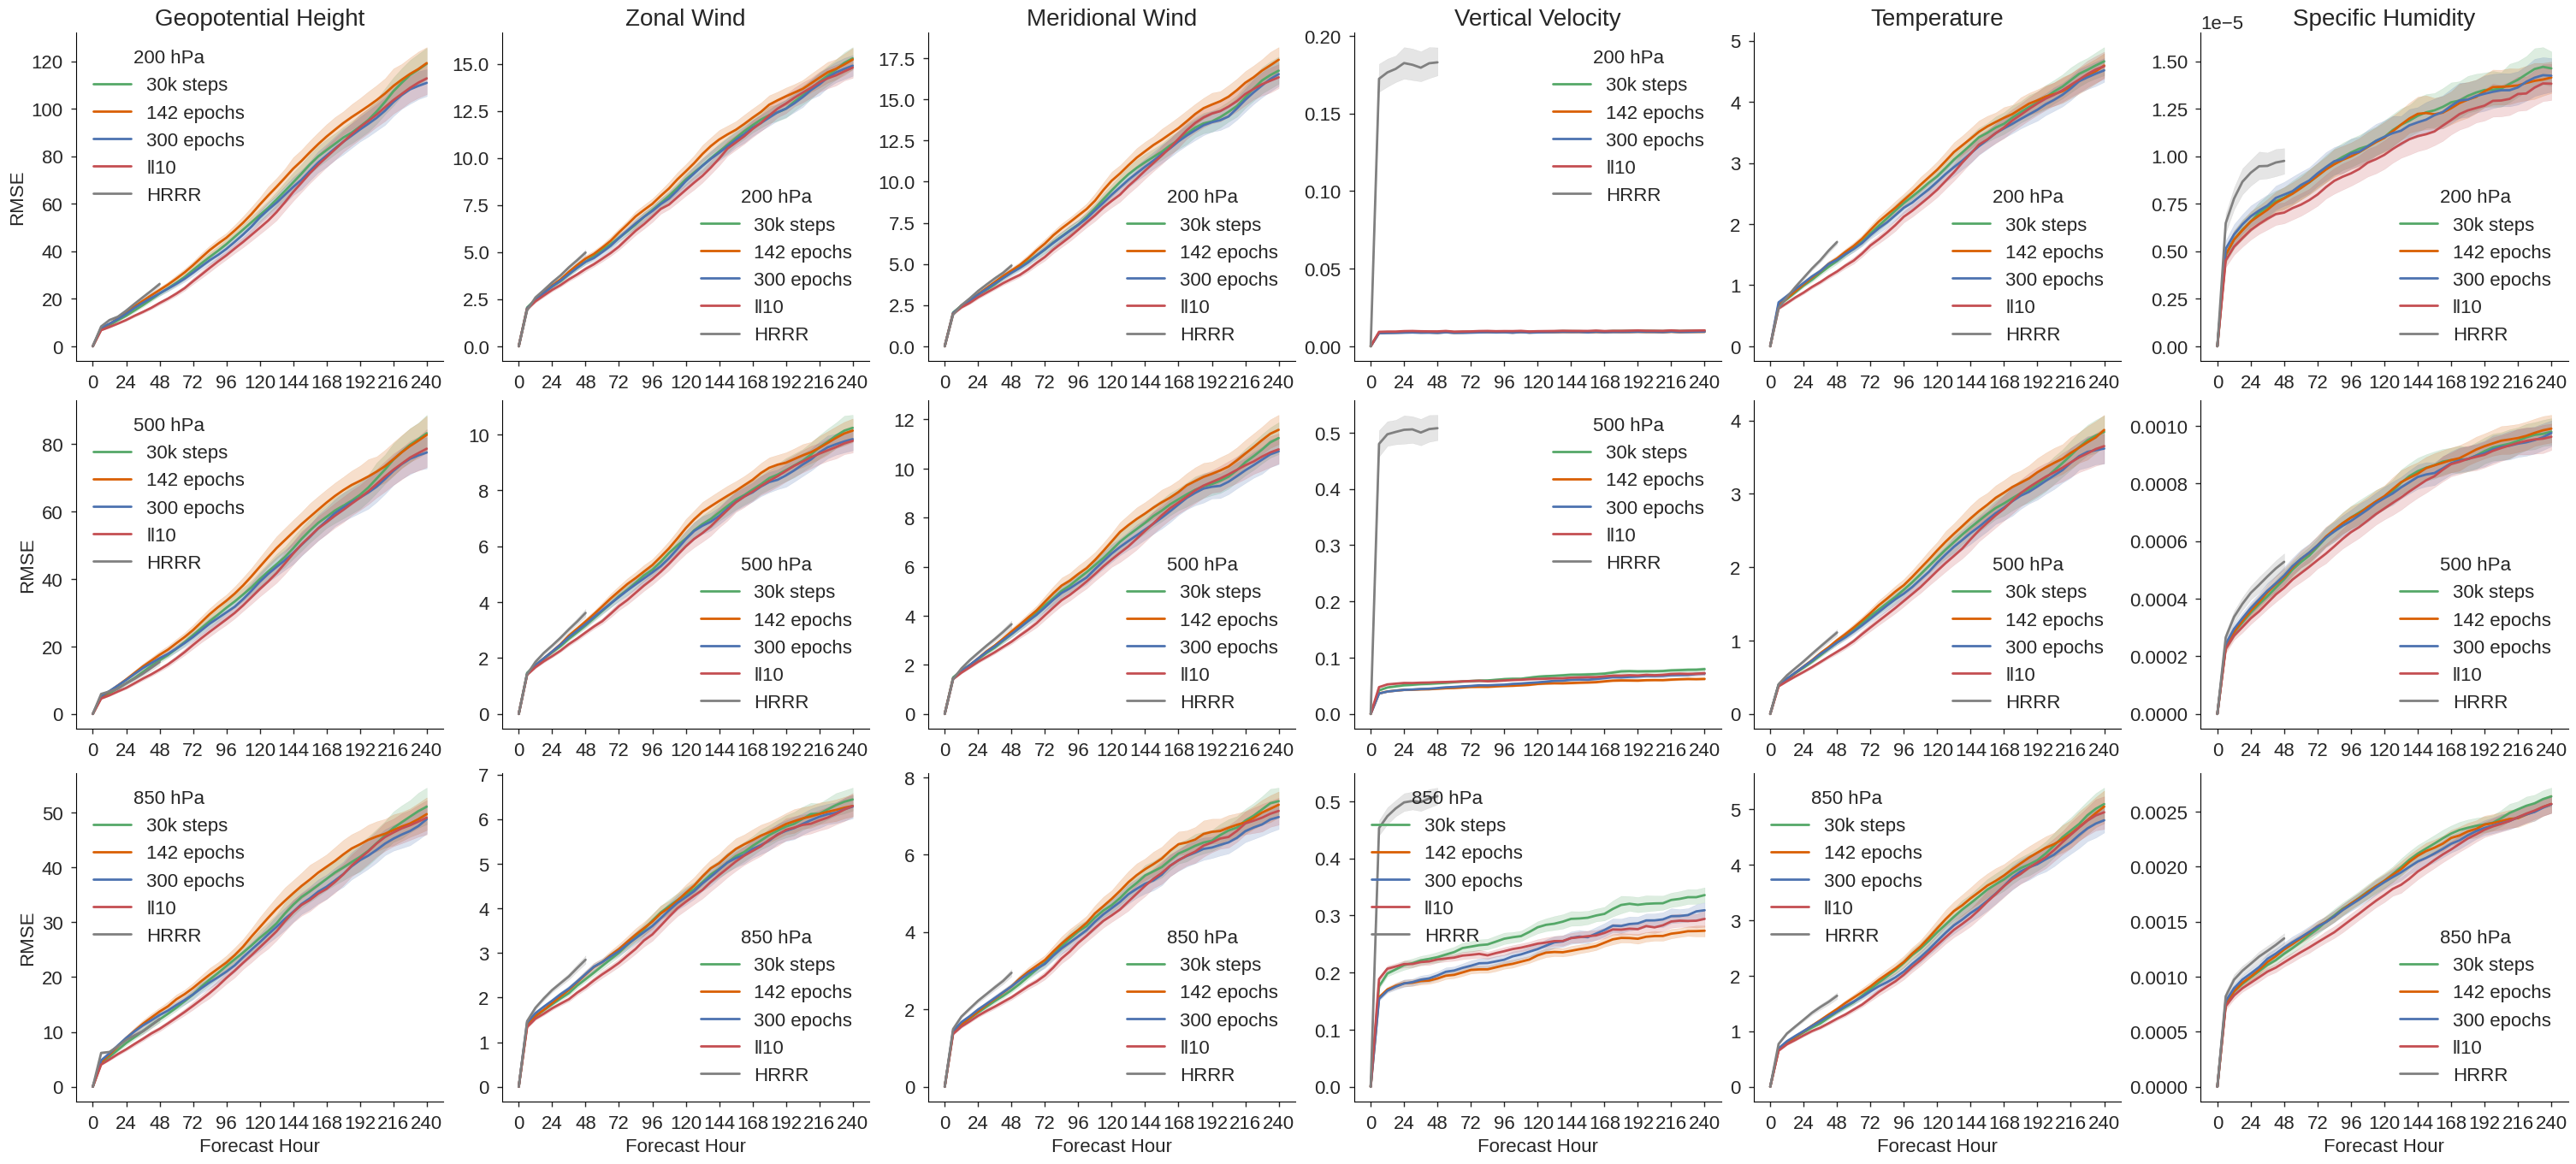

In [30]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict=traintime,
        **kwargs,
    )

In [ ]:
322.5 * .2

In [ ]:
246.34 * .2

## MMGT Architectures

### Surface

In [ ]:
#for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
#    plot_surface_error(
#        ["sp", "u10", "v10", "t2m", "sh2"],
#        dsdict=mmgt,
#        **kwargs,
#    );

### Pressure Levels

In [ ]:
#for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
#    plot_level_vars(
#        ["gh", "u", "v", "w", "t", "q"],
#        dsdict={key: xds for key, xds in models.items() if key in ("MMGT", "MMGT-NBD", "MMGT-TNBD", "HRRR")},
#        **kwargs,
#    )

## This shows the difference between evaluating over full HRRR vs trimmed HRRR

Basically, it makes sense to evaluate everything over the same trimmed region, but it doesn't make a huge difference.

In [ ]:
metric = "rmse"
models = {
    nicename: xr.open_dataset(
        f"/pscratch/sd/t/timothys/nested-eagle/v0/10percent/{shortname}/inference-validation/{metric}.nested-lam.nc",
        decode_timedelta=True,
    ) for shortname, nicename in zip(
        # edge sorting makes no difference
        ["mmgt", "mmgt-nbd", "mmgt-tnbd", "csmswt", "csmswt-win1080"], #, "csmswt-edgeunsorted"],
        ["MMGT", "MMGT-NBD", "MMGT-TNBD", "CSMSWT", "CSMSWT-win1080"], #, "CSMSWT-edgeunsorted"],
    )
}
models["T-MMGT"] = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/10percent/mmgt/inference-validation/trimmed/rmse.nested-lam.nc", decode_timedelta=True)
models["HRRR"] = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/rmse.lam.nc", decode_timedelta=True)
models["THRRR"] = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/baselines/hrrr-forecasts-vs-hrrr-analysis/trimmed/rmse.lam.nc", decode_timedelta=True)

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict={key: xds for key, xds in models.items() if key in ("MMGT", "T-MMGT", "MMGT-TNBD", "THRRR", "HRRR")},
        **kwargs,
    );

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_surface_error(
        ["sp", "u10", "v10", "t2m", "sh2"],
        dsdict={key: xds for key, xds in models.items() if key in ("MMGT", "T-MMGT", "CSMSWT-win1080", "THRRR", "HRRR")},
        **kwargs,
    );

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict={key: xds for key, xds in models.items() if key in ("MMGT", "T-MMGT", "MMGT-TNBD", "HRRR", "THRRR")},
        **kwargs,
    )

In [ ]:
for kwargs in [{"sel": {"fhr": slice(49)}, "marker": "o"}, {}]:
    plot_level_vars(
        ["gh", "u", "v", "w", "t", "q"],
        dsdict={key: xds for key, xds in models.items() if key in ("MMGT", "T-MMGT", "CSMSWT-win1080", "THRRR", "HRRR")},
        **kwargs,
    )